In [1]:
# Specify your working directory goes here
working_dir <- "C:/BUAS repos/2023-24a-fai2-adsai-MichalDziechciarz225484/EDA"
setwd(working_dir) # Setting working directory


In [2]:
## --Load Libraries-------------------------------------------------------------##
require("dplyr")
require("readr")
require("data.table")
require("ggplot2")
# library(ggplot2)


Loading required package: dplyr




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: readr

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Loading required package: ggplot2



In [3]:
## --Load Files -------------------------------------------------------------##
data_dir <- paste0(working_dir, "/data/")

numeric_data <- read_csv(paste0(data_dir, "df_num_2023-10-22.csv"))
text_data <- read_csv(paste0(data_dir, "df_text_2023-10-22.csv"))


Rows: 495 Columns: 419
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (419): StartDate, EndDate, Status, Progress, Duration (in seconds), Fini...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 495 Columns: 419
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (419): StartDate, EndDate, Status, Progress, Duration (in seconds), Fini...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
cleaned_data <- text_data[complete.cases(text_data), ]

# Get all rows with demo_domain == "Leisure & Events"
leisure_events <- text_data[text_data$demo_domain == "Leisure & Events" & !is.na(text_data$demo_domain), ]


In [5]:
# Read the values of the column and if all is NA, remove this entire column
na_columns <- which(colSums(is.na(leisure_events)) == nrow(leisure_events))

# Remove all columns with NA values
leisure_events <- leisure_events[, -na_columns]


In [6]:
# Columns to exclude
leisure_events <- leisure_events %>% select(-Q3.7:-Q10.9)

leisure_events <- leisure_events %>% select(-G_awareness:-Q4.1)


In [7]:
# settings to visualize all the columns
head(leisure_events, 5)


StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,⋯,acc_6,LE_acceptance,LE_ethicalconcern...76,LE_bias...77,LE_ethicalconcern...78,LE_transparency,LE_bias...80,LE_efficacy,LE_fairness,msc_ai_t
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2023-10-11 02:13:41,2023-10-11 02:17:14,IP Address,100,213,True,2023-10-11 02:17:15,R_24u9OCTLvSZ9eoU,qr,EN,⋯,Somewhat agree,NA,NA,NA,NA,NA,NA,NA,NA,I would most likely not consider enrollment.
2023-10-11 02:14:31,2023-10-11 02:18:35,IP Address,100,243,True,2023-10-11 02:18:36,R_1Ho7MHaPMj9wqyd,qr,EN,⋯,Somewhat agree,Neutral,Agree,Neutral,Neutral,Agree,Disagree,Disagree,Agree,I don’t have an opinion yet.
2023-10-11 02:15:23,2023-10-11 02:26:20,IP Address,100,656,True,2023-10-11 02:26:21,R_2f6ycyHxakQ6nAU,qr,EN,⋯,Somewhat agree,NA,NA,NA,NA,NA,NA,NA,NA,I don’t have an opinion yet.
2023-10-11 02:20:11,2023-10-11 02:34:52,IP Address,100,880,True,2023-10-11 02:34:53,R_2UVrMEKpmaYLrHU,qr,EN,⋯,Somewhat agree,Agree,Neutral,Disagree,Agree,Disagree,Agree,Agree,Agree,I don’t have an opinion yet.
2023-10-11 02:31:06,2023-10-11 02:36:01,IP Address,100,295,True,2023-10-11 02:36:02,R_3JslnVTsmw3h7Ju,qr,EN,⋯,Strongly disagree,NA,NA,NA,NA,NA,NA,NA,NA,I would most likely not consider enrollment.


In [8]:
# show all the column names
names(leisure_events)


[1] "StartDate"              "EndDate"                "Status"                
 [4] "Progress"               "Duration (in seconds)"  "Finished"              
 [7] "RecordedDate"           "ResponseId"             "DistributionChannel"   
[10] "UserLanguage"           "Q2.2"                   "demo_role"             
[13] "demo_gender"            "demo_age"               "demo_domain"           
[16] "demo_year_study"        "demo_experience"        "demo_ai_know"          
[19] "ml_dl_famil"            "aware_dom"              "ai_courses"            
[22] "aware_everyday"         "used_ai"                "att_pos_1"             
[25] "att_pos_2"              "att_pos_3"              "att_pos_4"             
[28] "att_neg_1"              "att_neg_2"              "att_neg_3"             
[31] "acc_1"                  "acc_2"                  "acc_3"                 
[34] "acc_4"                  "acc_5"                  "acc_6"                 
[37] "LE_acceptance"          "LE_ethicalconcern...76" "LE_bias...77"          
[40] "LE_ethicalconcern...78" "LE_transparency"        "LE_bias...80"          
[43] "LE_efficacy"            "LE_fairness"            "msc_ai_t"

In [9]:
# Check for missing values
sum(is.na(text_data))


[1] 186697

In [10]:
# Assuming your dataframe is 'text_data'
count <- sum(leisure_events$demo_domain == "Leisure & Events")


# Print the count
print(count)


[1] 56


In [11]:
unique(text_data$demo_role)

# Count students
count_students <- sum(text_data$demo_role == "Student", na.rm = TRUE)

# Count staff (educator, supporting staff, and management)
count_staff <- sum(text_data$demo_role %in% c("Educator", "Supporting Staff", "Management"), na.rm = TRUE)

# Print the counts
cat("Students: ", count_students, "\n")
cat("Staff: ", count_staff, "\n")


[1] "What is your role?"        "{\"ImportId\":\"QID443\"}"
[3] "Educator"                  "Student"                  
[5] NA                          "Supporting Staff"         
[7] "Management"                "Other Staff"

Students:  352 
Staff:  72 


In [12]:
unique(text_data$demo_gender)

# Count the number of participants for each gender category
count_male <- sum(text_data$demo_gender == "Male", na.rm = TRUE)
count_female <- sum(text_data$demo_gender == "Female", na.rm = TRUE)
count_prefer_not_to_say <- sum(text_data$demo_gender == "Prefer not to say", na.rm = TRUE)
count_third_gender <- sum(text_data$demo_gender == "Non-binary / third gender", na.rm = TRUE)

# Print the counts
cat("Male: ", count_male, "\n")
cat("Female: ", count_female, "\n")
cat("Prefer not to say: ", count_prefer_not_to_say, "\n")
cat("Third gender: ", count_third_gender, "\n")


[1] "What gender do you identify as?" "{\"ImportId\":\"QID6\"}"        
[3] "Male"                            "Female"                         
[5] "Prefer not to say"               NA                               
[7] "Non-binary / third gender"

Male:  157 
Female:  255 
Prefer not to say:  2 
Third gender:  3 


# Acceptance analysis


### acc_1

I intend to use AI to automate repetitive tasks


Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


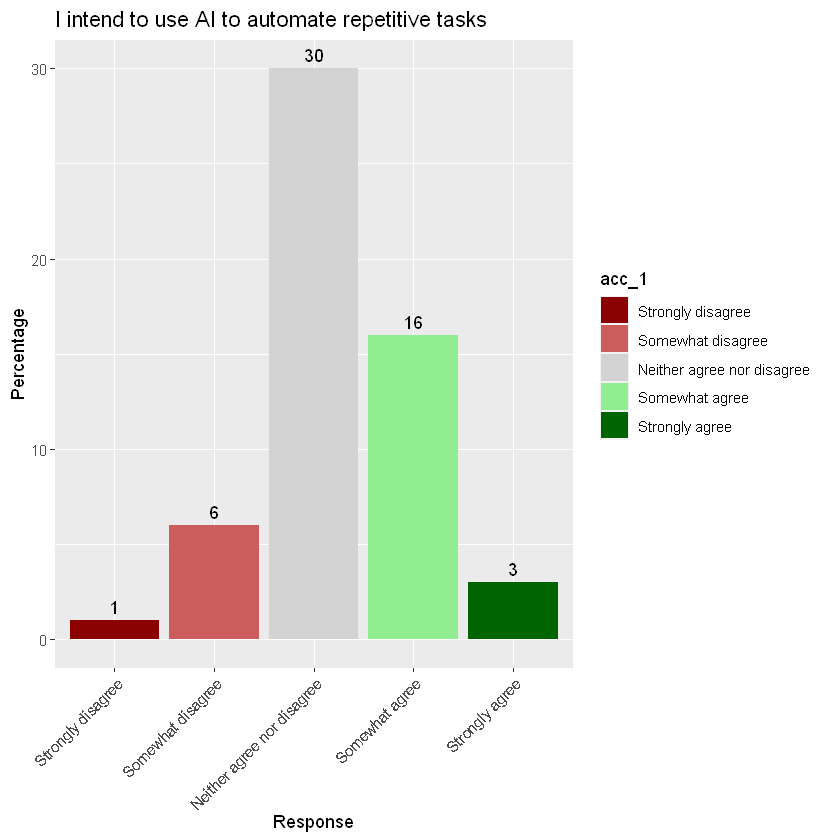

In [13]:
# Replaace missing values with "Neither agree nor disagree"
leisure_events$acc_1 <- ifelse(is.na(leisure_events$acc_1), "Neither agree nor disagree", leisure_events$acc_1)

colors <- c("darkred", "indianred", "lightgrey", "lightgreen", "darkgreen")
names(colors) <- c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree")

# Reorder the response variable levels
leisure_events$acc_1 <- factor(leisure_events$acc_1, levels = c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"))




# Create a bar plot using ggplot2
ggplot(leisure_events, aes(x = acc_1, fill = acc_1)) +
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(
    title = "I intend to use AI to automate repetitive tasks",
    x = "Response",
    y = "Percentage"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### acc_2

I intend to use AI to assist me with creative tasks


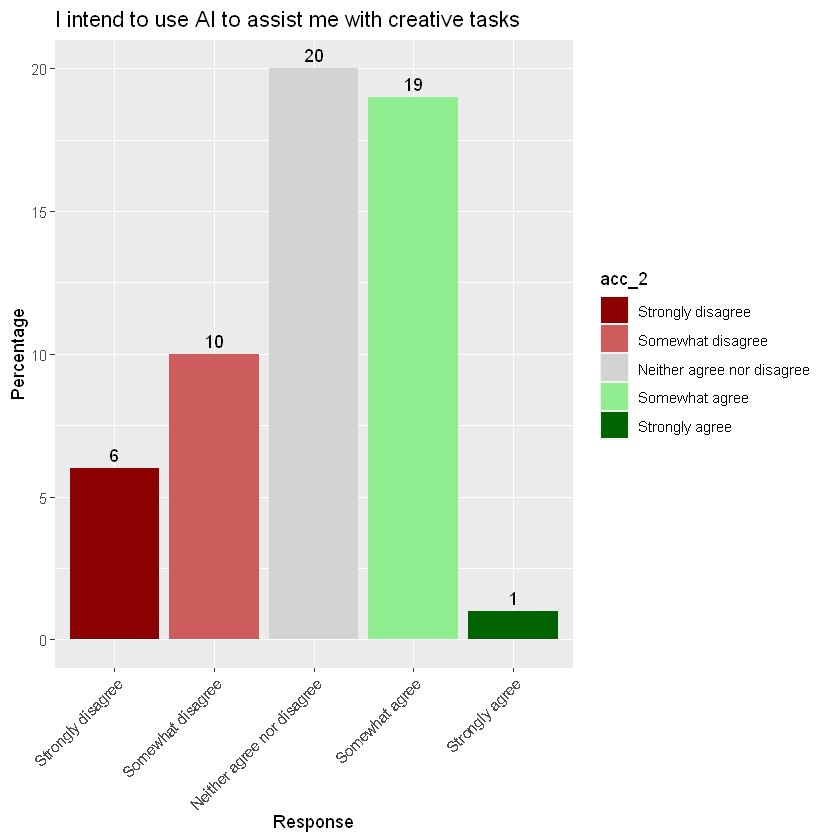

In [14]:
# Replaace missing values with "Neither agree nor disagree"
leisure_events$acc_2 <- ifelse(is.na(leisure_events$acc_2), "Neither agree nor disagree", leisure_events$acc_2)

colors <- c("darkred", "indianred", "lightgrey", "lightgreen", "darkgreen")
names(colors) <- c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree")

# Reorder the response variable levels
leisure_events$acc_2 <- factor(leisure_events$acc_2, levels = c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"))




# Create a bar plot using ggplot2
ggplot(leisure_events, aes(x = acc_2, fill = acc_2)) +
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(
    title = "I intend to use AI to assist me with creative tasks",
    x = "Response",
    y = "Percentage"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### acc_3

I intend to use AI in my learning activities


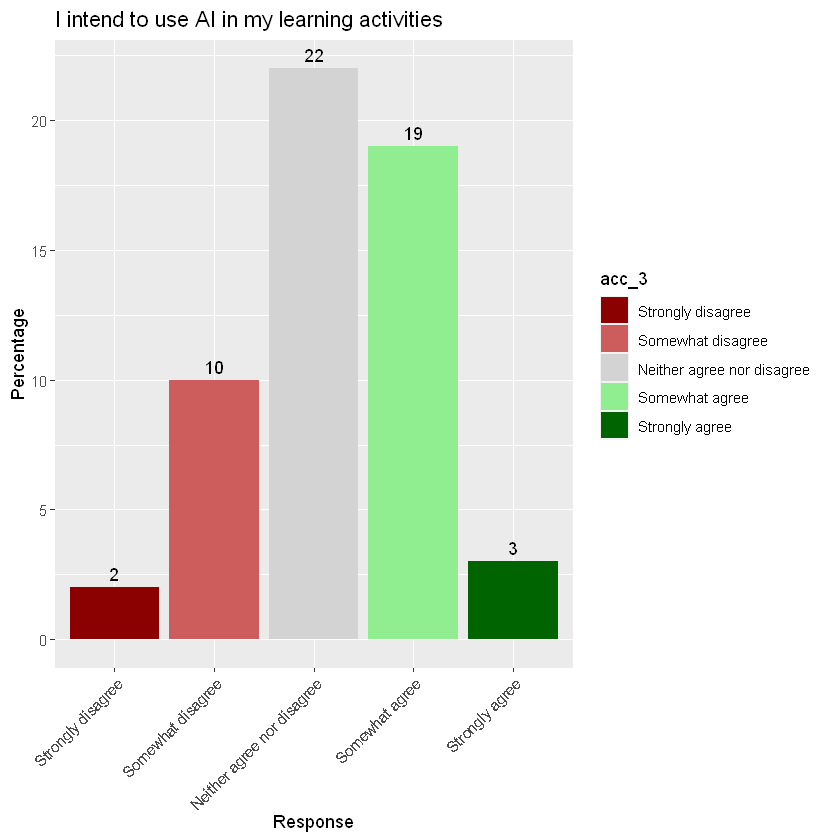

In [15]:
# Replaace missing values with "Neither agree nor disagree"
leisure_events$acc_3 <- ifelse(is.na(leisure_events$acc_3), "Neither agree nor disagree", leisure_events$acc_3)

colors <- c("darkred", "indianred", "lightgrey", "lightgreen", "darkgreen")
names(colors) <- c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree")

# Reorder the response variable levels
leisure_events$acc_3 <- factor(leisure_events$acc_3, levels = c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"))




# Create a bar plot using ggplot2
ggplot(leisure_events, aes(x = acc_3, fill = acc_3)) +
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(
    title = "I intend to use AI in my learning activities",
    x = "Response",
    y = "Percentage"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### acc_4

I intend to stay informed about emerging AI technologies


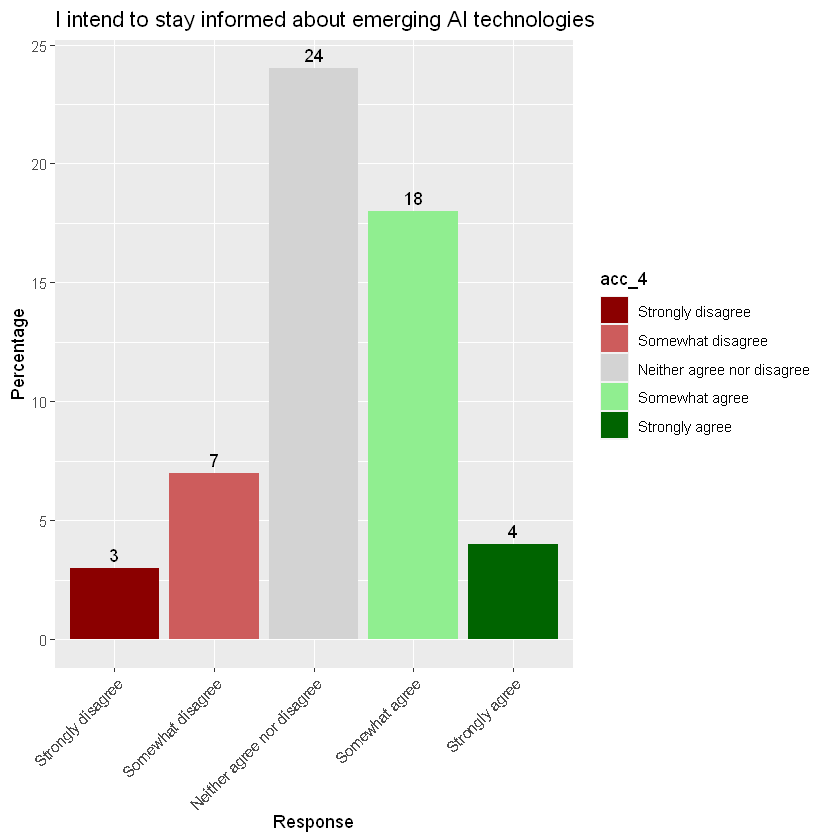

In [16]:
# Replaace missing values with "Neither agree nor disagree"
leisure_events$acc_4 <- ifelse(is.na(leisure_events$acc_4), "Neither agree nor disagree", leisure_events$acc_4)

colors <- c("darkred", "indianred", "lightgrey", "lightgreen", "darkgreen")
names(colors) <- c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree")

# Reorder the response variable levels
leisure_events$acc_4 <- factor(leisure_events$acc_4, levels = c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"))




# Create a bar plot using ggplot2
ggplot(leisure_events, aes(x = acc_4, fill = acc_4)) +
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(
    title = "I intend to stay informed about emerging AI technologies",
    x = "Response",
    y = "Percentage"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### acc_5

I intend to incorporate AI into my workflow


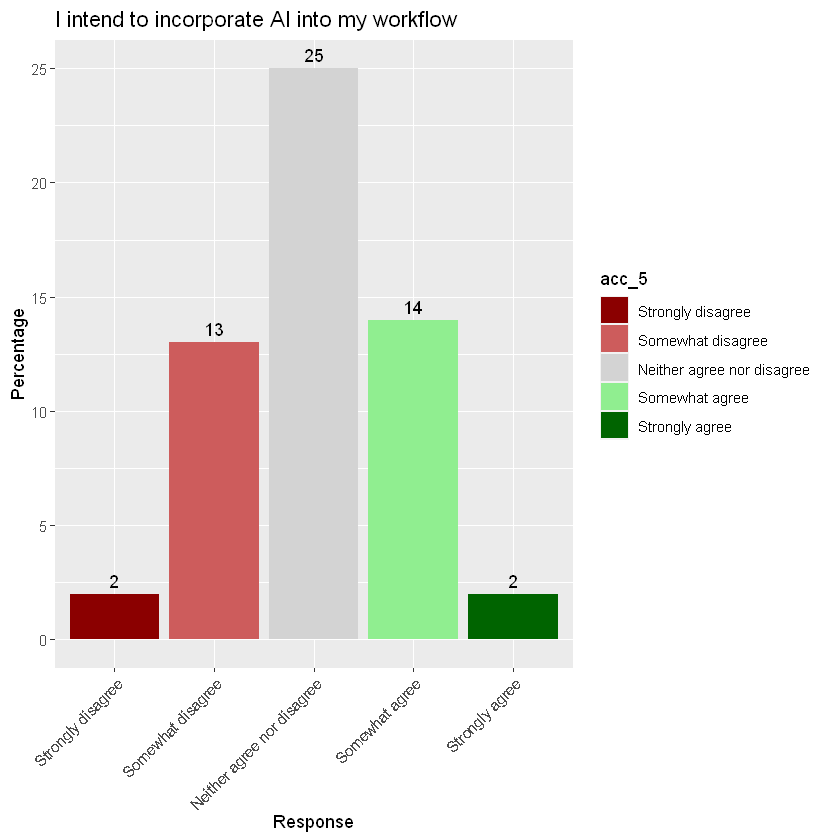

In [17]:
# Replaace missing values with "Neither agree nor disagree"
leisure_events$acc_5 <- ifelse(is.na(leisure_events$acc_5), "Neither agree nor disagree", leisure_events$acc_5)

colors <- c("darkred", "indianred", "lightgrey", "lightgreen", "darkgreen")
names(colors) <- c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree")

# Reorder the response variable levels
leisure_events$acc_5 <- factor(leisure_events$acc_5, levels = c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"))




# Create a bar plot using ggplot2
ggplot(leisure_events, aes(x = acc_5, fill = acc_5)) +
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(
    title = "I intend to incorporate AI into my workflow",
    x = "Response",
    y = "Percentage"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### acc_6

I intend to work with AI in my future career


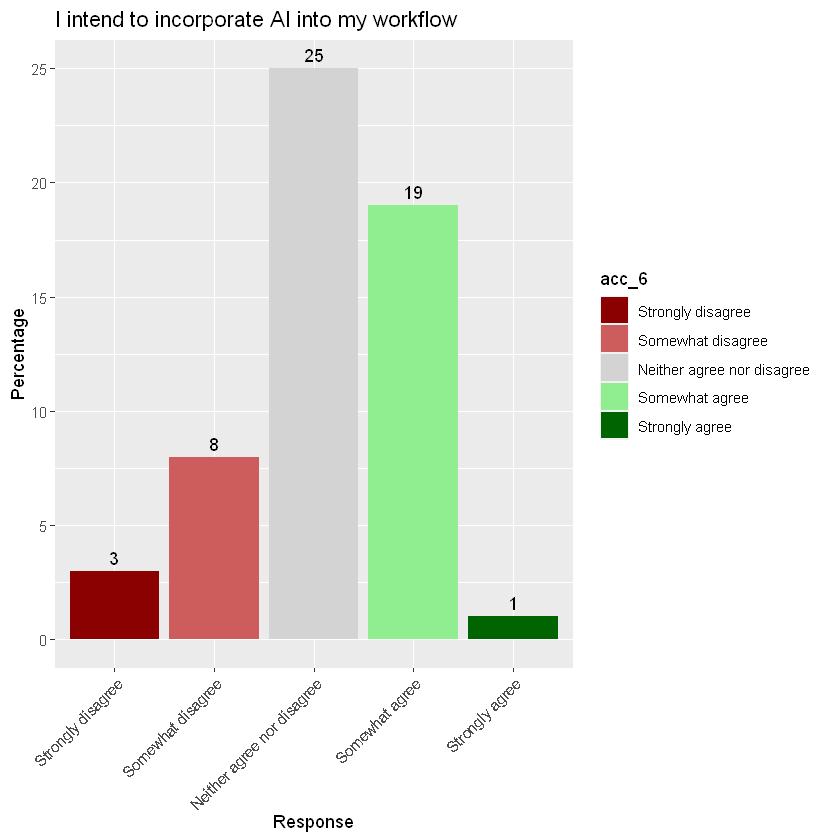

In [18]:
# Replaace missing values with "Neither agree nor disagree"
leisure_events$acc_6 <- ifelse(is.na(leisure_events$acc_6), "Neither agree nor disagree", leisure_events$acc_6)

colors <- c("darkred", "indianred", "lightgrey", "lightgreen", "darkgreen")
names(colors) <- c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree")

# Reorder the response variable levels
leisure_events$acc_6 <- factor(leisure_events$acc_6, levels = c("Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"))




# Create a bar plot using ggplot2
ggplot(leisure_events, aes(x = acc_6, fill = acc_6)) +
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(
    title = "I intend to incorporate AI into my workflow",
    x = "Response",
    y = "Percentage"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
